In [3]:
#Import dependencies 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Churn_Modelling (1).csv")
df2 = df

In [9]:
df.shape
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


Figure(1000x400)


<Axes: xlabel='Age'>

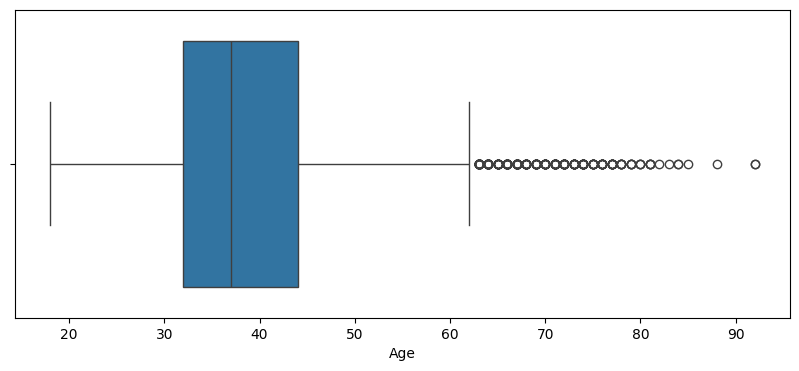

In [10]:
#Checking outliers
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Age", data = df2) 

<Axes: xlabel='Geography', ylabel='count'>

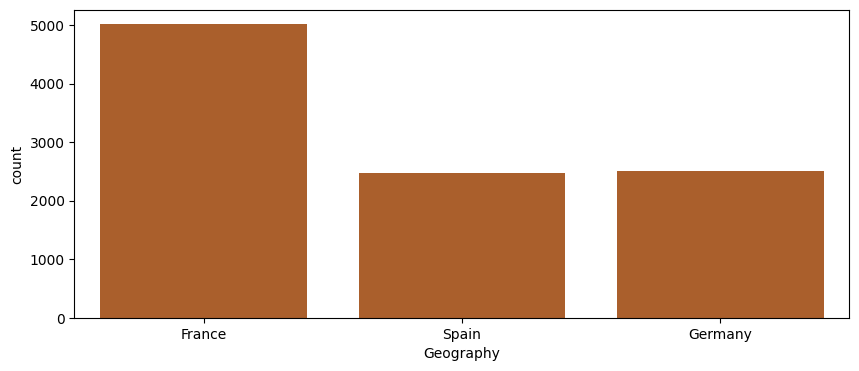

In [11]:
#Visualizing by Geography
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("Accent_r") 
sns.set_palette(color_palette)
sns.countplot(x = "Geography", data = df2) 

<Axes: xlabel='IsActiveMember', ylabel='count'>

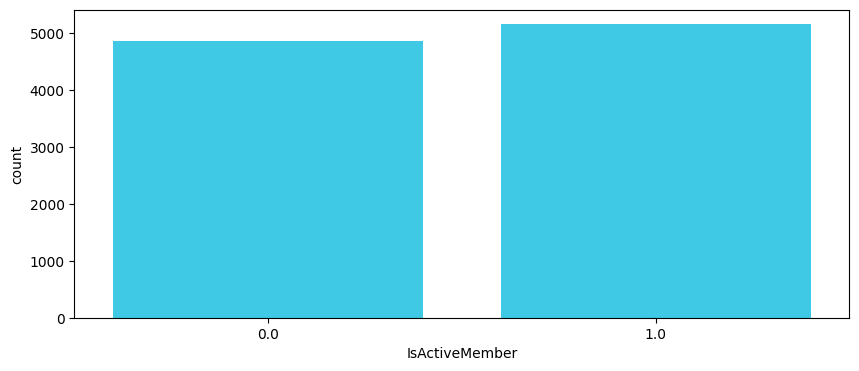

In [12]:
#Count of Active Members
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("cool")
 
sns.set_palette(color_palette) 
sns.countplot(x = "IsActiveMember", data = df2) 

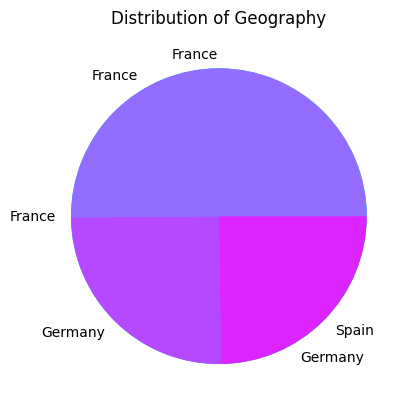

In [14]:
#Distribution of Geography
grp = dict(df2.groupby('Geography').groups) 
m = {}
for key, val in grp.items(): 
    if key in m:
        m[key] += len(val) 
    else:
        m[key] = len(val) 
        plt.title("Distribution of Geography") 
        plt.pie(m.values(), labels = m.keys())


<Axes: xlabel='Gender', ylabel='count'>

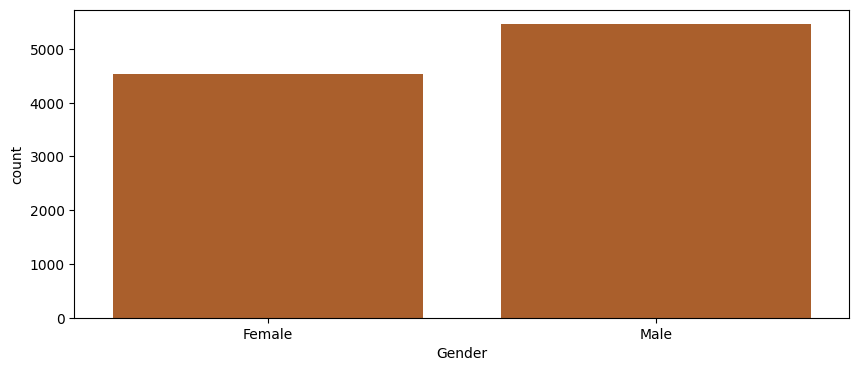

In [15]:
# #Exploring number of people by gender (Male/Female) 
plt.figure(figsize = (10, 4), dpi = 100)
color_palette = sns.color_palette("Accent_r") 
sns.set_palette(color_palette)
sns.countplot(x = "Gender", data = df2) 

<Axes: xlabel='Geography', ylabel='Exited'>

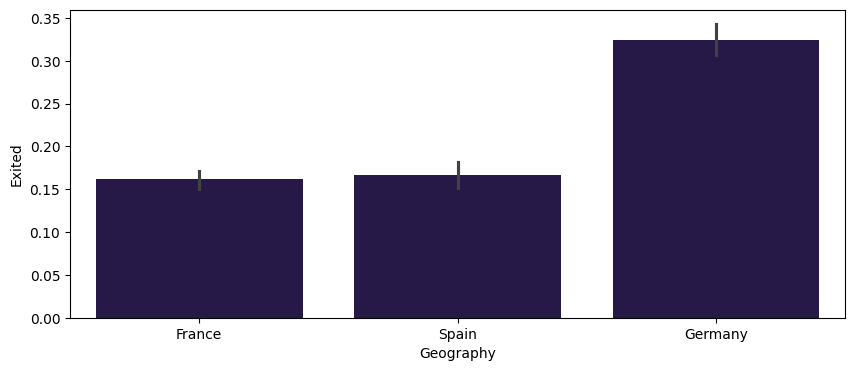

In [19]:
# Geography analysis of Exited Customers
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("magma") 
sns.set_palette(color_palette)
sns.barplot(x = "Geography", y = "Exited", data = df2) 

<Axes: xlabel='Geography', ylabel='IsActiveMember'>

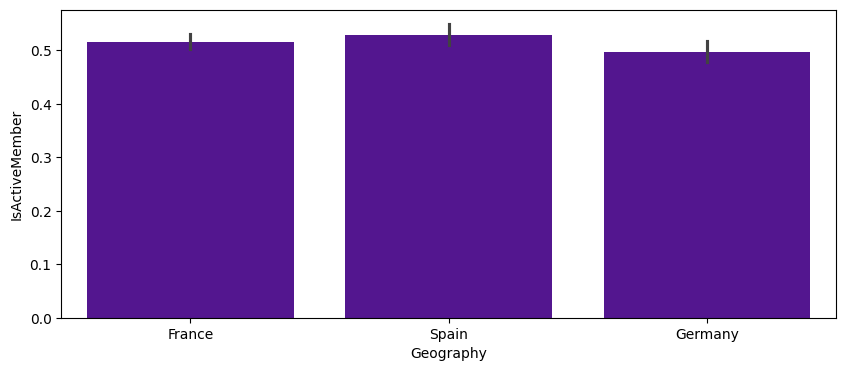

In [24]:
# Geography analysis as per IsActiveMember 
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("plasma") 
sns.set_palette(color_palette)
 
sns.barplot(x = "Geography", y = "IsActiveMember", data = df2) 

C:\Users\HP\AppData\Local\Temp\ipykernel_12016\647856703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["IsActiveMember"].replace({"yes":1, "no":0}, inplace = True)


<Axes: xlabel='Age', ylabel='IsActiveMember'>

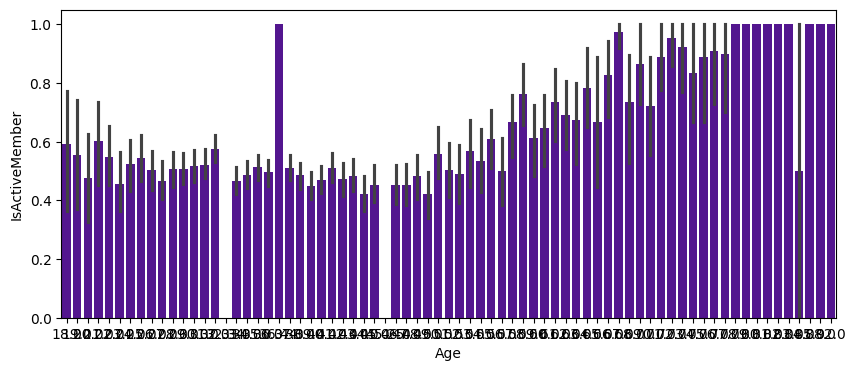

In [33]:
# Age as per IsActiveMember
df2["IsActiveMember"].replace({"yes":1, "no":0}, inplace = True) 
plt.figure(figsize = (10, 4), dpi = 100)
color_palette = sns.color_palette("plasma") 
sns.set_palette(color_palette)
sns.barplot(x = "Age", y = "IsActiveMember", data = df2) 

C:\Users\HP\AppData\Local\Temp\ipykernel_12016\936257733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["Exited"].replace({1:"yes", 0:"no"}, inplace = True)


<Axes: xlabel='Exited', ylabel='count'>

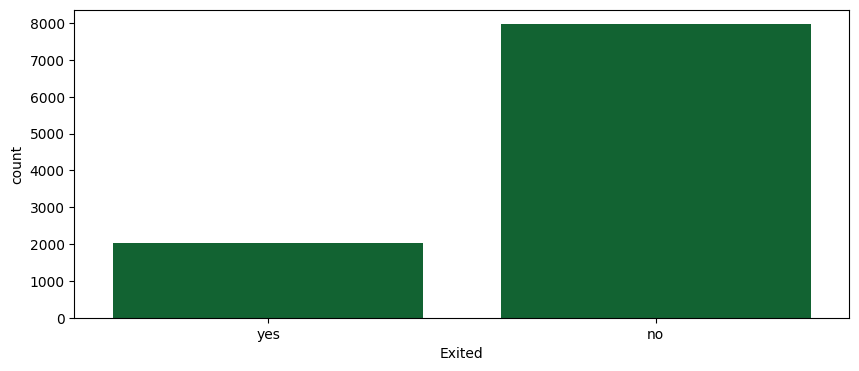

In [30]:
# Number of smokers
df2["Exited"].replace({1:"yes", 0:"no"}, inplace = True) 
plt.figure(figsize = (10, 4), dpi = 100)
color_palette = sns.color_palette("BuGn_r") 
sns.set_palette(color_palette) 
sns.countplot(x = "Exited", data = df2)


<Axes: >

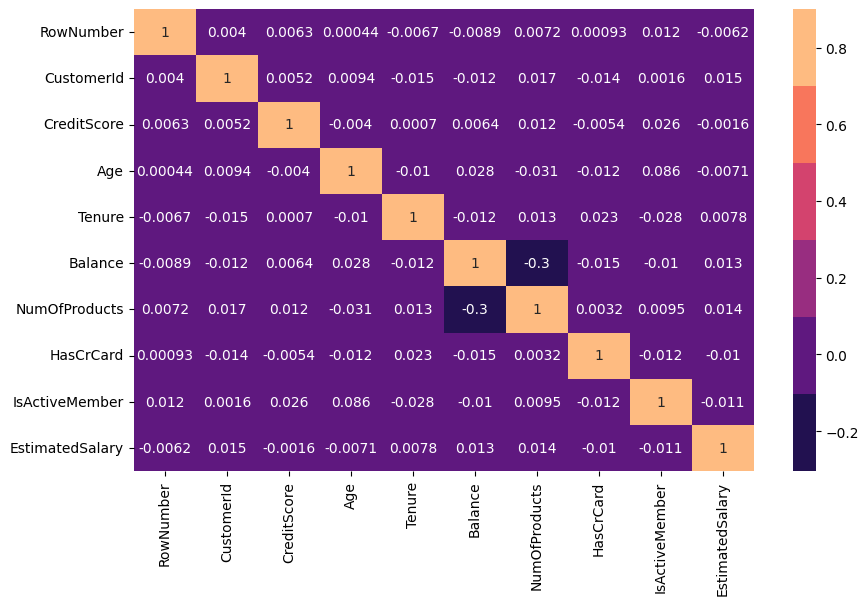

In [32]:
# Finding correlation 
plt.figure(figsize = (10, 6), dpi = 100) 
color = sns.color_palette("magma")
numeric_df = df2.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), vmax=0.9, annot=True, cmap=color)
